# Practice: Statistical analysis of the Lipinski's rule of five

## Theory

### **Pharmacokinetics**

Pharmacokinetics are the study of what happens to a compound in an organism over a period of time ([Grogan S, Preuss CV. Pharmacokinetics, 2022](https://www.ncbi.nlm.nih.gov/books/NBK557744/)). It is divide into four steps: **A**bsorption, **D**istribution, **M**etabolism and **E**xcretion ([ADME](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4110820/)). Some times also is includes **T**oxicology (ADMET) and **L**iberation (LADME).

 
![ADME](Data/ADME.jpg)

*Figure 1*. Steps that make up the pharmacokinetics. From: [Somvanshi, Kharat, Jadhav, Thorat & Townley, 2021](https://doi.org/10.1016/B978-0-323-85050-6.00007-4)

   * **Absorption:** It refers to the amount and time it takes for a compound or substance to enter to the systemic circulationt from the site of administration. This depends on multiple factors such as the ability of the compound to penetrate the intestinal wall, the solubility of the compound, the gastric emptying time, the chemical stability of the compound in the stomach, among others.
   * **Distribution:** It refers to how a substance is spread throughout the body. This depends on the diffusion and convection which may be influenced by the polarity, size, or binding abilities of the drug, the fluid status of the patient, or the body habitus of the individual. It is very important to achieve the effective drug concentration in the receptor site because to be effective a medication must reach its designated compartmental destination.
   * **Metabolism:** It refers to the processing of the drug by the body into subsequent compounds. It can be also to convert a drug  into more water-soluble substances in order to be more easily to excreted or in the case of prodrugs the metabolism is required to convert the drug into active metabolites.
   * **Excretion:** It refers to the process by which the drug is eliminated from the body. Generally the kidneys are the conduct of excretion by a passive filtration in the glomerulus or secretion in the tubules.

### **Lipinski's rule of five:**

The Lipinski's rule of five is one way to screen out compounds with probable absorption problems. This rule states that poor absorption or permeation of a drug is more probable when the chemical structure fulfils two or more of the [following criteria:](https://www.sciencedirect.com/science/article/pii/B008045044X001474)
1. Molecular weight (MW) is greater than 500.
2. The calculated log P value is above 5.
3. There are more than 5 hydrogen bond donors (–NH–, –OH).
4. The number of hydrogen bond acceptors (–N ¼ , –O–) is greater than 10.

It is importat to know that the rule of five e does not definitively categorize all well and poorly absorbed compounds, although it is simple, fast, and provides a reasonable degree of classification.

## Problem Statement

For an investigation of a new drug we want to know if it is really absorbed by the body, if it is able to cross certain barriers to reach his target, how is it metabolized and how is excreted from the body. In this way doctors will have greater flexibility in prescribing and administering medications thus providing greater benefit with less risk and making adjustments as necessary, given the varied physiology and lifestyles of patients.

In order to know the absorption of the compounds we will use bioinformatic tools to be able to calculate Lipinski's rule of five and then we will calculate some statistics to plot them and analyze.

## Import the necessary libraries

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi

## Load dataset of GSK3B

In [4]:
comp_def = pd.read_csv('data/GSK3B_compounds.csv', index_col=0)
print(comp_def.shape)
comp_def.head()

(2559, 3)


,pvalue,smiles,ROMol
molecule_chembl_id,,,
CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i..."


## Lipinski's rule of five

In [6]:
def df_rule_5(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated 
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])



Now we are going to apply Lipinski's rule of 5 to our data set

In [7]:
rule5_df = comp_def.apply(df_rule_5, axis=1)
print('# of compounds in unfiltered data set:', len(comp_def))

# of compounds in unfiltered data set: 2559


In [8]:
# Name condition columns
rule5_df.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']

In [9]:
# Concatenate dataset with computed values
comp_def = comp_def.join(rule5_df)

In [10]:
# Delete empty rows --> rule of five
fil_df = comp_def[comp_def['rule_of_five_conform']=='yes']
print('# of compounds in filtered data set:', len(fil_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(comp_def)-len(fil_df)))

# of compounds in filtered data set: 2385
# of compounds not compliant with Lipinski's rule of five: 174


Now we will save the filtered data

In [11]:
fil_df.to_csv('data/GSK3B_compounds_lipinski.csv', sep=';') 
fil_df.head(10)

,pvalue,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
molecule_chembl_id,,,,,,,,
CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
CHEMBL2177173,9.66,CN1CCN(S(=O)(=O)c2ccc(-c3cnc(N)c(C(=O)Nc4cnccc...,"<img data-content=""rdkit/molecule"" src=""data:i...",536.231808,9,2,1.9050,yes
CHEMBL3091542,9.64,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes


## Plot the properties of the rule of five per molecule as bar plots.

In [12]:
# Import the filtered compounds
lipinski_comp = pd.read_csv('data/GSK3B_compounds_lipinski.csv', sep=';')
print(lipinski_comp.shape)
lipinski_comp.head(10)

(2385, 9)


,molecule_chembl_id,pvalue,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
2,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
5,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
6,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
7,CHEMBL2177173,9.66,CN1CCN(S(=O)(=O)c2ccc(-c3cnc(N)c(C(=O)Nc4cnccc...,"<img data-content=""rdkit/molecule"" src=""data:i...",536.231808,9,2,1.9050,yes
8,CHEMBL3091542,9.64,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes
9,CHEMBL491647,9.64,COCc1cccc2c(C3=C(c4coc5ccccc45)C(=O)NC3=O)cn(C...,"<img data-content=""rdkit/molecule"" src=""data:i...",386.126657,5,1,3.6381,yes


Since we have many molecules we will do it only for the first 5 of the DataFrame

In [13]:
comp_5_lipinski = lipinski_comp.iloc[:5]
comp_5_lipinski

,molecule_chembl_id,pvalue,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
2,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes


Now we will make the bar plot. For these we followed the [talktorial T002 · Molecular filtering: ADME and lead-likeness criteria](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb)

In [67]:
ro5_properties = {
    "MW": (500, "molecular weight (Da)"),
    "HBA": (10, "# HBA"),
    "HBD": (5, "# HBD"),
    "LogP": (5, "logP"),
}

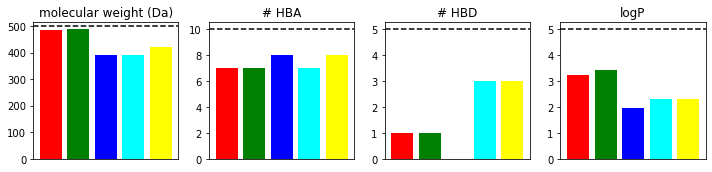

In [76]:
# https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb


# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(comp_5_lipinski) + 1)
colors = ["red", "green", "blue", "cyan", "yellow"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([0, 1, 2, 3, 4], comp_5_lipinski [key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend- INTENTAR DE OTRA FORMA
#legend_elements = [
#    mpatches.Patch(color=row["color"], label=row["name"]) for index, row in comp_5_lipinski.iterrows()]
#legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
#fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

## Plot the properties of the rule of five per molecule as radar plot.

In [17]:
# Import the filtered compounds
lipinski_comp = pd.read_csv('../2.2_Graficas/Data/GSK3B_compounds_lipinski.csv', sep=';')
print(lipinski_comp.shape)
lipinski_comp.head(10)

(2121, 9)


,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
2,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
5,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
6,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
7,CHEMBL3091542,9.64,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes
8,CHEMBL491647,9.64,COCc1cccc2c(C3=C(c4coc5ccccc45)C(=O)NC3=O)cn(C...,"<img data-content=""rdkit/molecule"" src=""data:i...",386.126657,5,1,3.6381,yes
9,CHEMBL4076186,9.60,COc1cc(F)ccc1C1CN(c2nc(-c3ccncn3)cc(=O)n2C)CCN...,"<img data-content=""rdkit/molecule"" src=""data:i...",432.147680,8,1,1.9577,yes


For the radar plot we need the mean and standard deviations of a dataset, so we will create a function that allows us to calculate these two statistics.

In [18]:
def get_properties_stats(data_df):
    
    properties = ["HBD", "HBA", "MW", "LogP"]
    
    data_stats = []
    
    for i in properties:
        std = data_df[i].std()
        mean = data_df[i].mean()
        stats = pd.DataFrame([[round(mean, 2), round(std, 2)]], index=[i], columns=["mean", "std"])
        data_stats.append(stats)
    
    data_stats = pd.concat(data_stats)
    
    return data_stats

Now we calculate the statistic for the dataset filtered of compounds compliant with Lipinski's rule of five.

In [19]:
stats_rof = get_properties_stats(lipinski_comp)
stats_rof

,mean,std
HBD,1.74,1.15
HBA,5.32,1.95
MW,374.44,78.60
LogP,3.24,1.26


Now we calculate the statistic for the dataset of compounds NOT compliant with Lipinski's rule of five.

In [20]:
stats_not_rof = get_properties_stats(comp_def[comp_def['rule_of_five_conform']=='no'])
stats_not_rof

,mean,std
HBD,2.41,2.08
HBA,7.86,3.47
MW,605.69,149.78
LogP,5.56,1.93


#### From this point forward we followed the [talktorial T002 · Molecular filtering: ADME and lead-likeness criteria](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb)

We will need some helper functions to that are only used for radar plotting.

Frist we will prepare the y values of the radar plot. So we need to heed that the properties used for the Rule of five criteria are of different magnitudes. For example, the molecular_weight as a threshold of 500, whereas the number of HBAs and HBDs and the LogP have thresholds of only 10, 5, and 5, respectively. So we will scale all property values to a scaled threshold of 5.

In [21]:
# stats is the Dataframe with "mean" and "std" for each physicochemical property.
# thresholds defined for each property.
# scaled_threshold across all properties
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    # scaled_scale = property value / property threshold * scaled property threshold
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

Having prepare the y values we will prepare the x values. These values are the angles as radians of the physicochemical property axes for the radar plot.

In [22]:
def _define_radial_axes_angles(n_axes):

    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

Finally we can do the radar plot.

In [29]:
def plot_radar(
    y,                    # Dataframe with "mean" and "std" for each physicochemical property.
    thresholds,           # Thresholds defined for each property.
    scaled_threshold,     # Scaled thresholds across all properties.
    properties_labels,    # List of property names to be used as labels in the plot.
    y_max=None,           # Set maximum y value. If None, let matplotlib decide.
    output_path=None,     # If not None, save plot to file.
    
    # Use the helper function to define radial x-axes angles.
    x = _define_radial_axes_angles(len(y))
    # Use the helper funtion to scale y-axis values with respect to a defined threshold.
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])
    
     # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    
    # Plot data
    ax.fill(x, [scaled_threshold] * 5, "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")    

SyntaxError: invalid syntax (<ipython-input-29-123b040f58e8>, line 12)